In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math
import itertools
from sklearn import preprocessing
import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt

C:\Users\joker\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


In [59]:
df1 = pd.read_csv('./SelfData_thesis/0709_poisson20GData_3to7_ONU16.csv', usecols=[1], engine='python')
df1.head()

,Gi
0,112709
1,95164
2,119312
3,128041
4,115606


In [60]:
df2 = pd.read_csv('./SelfData_thesis/0709_poisson20GData_3to7_ONU16.csv', usecols=[2], engine='python')
df2.head()

,Ai
0,111343
1,86114
2,115912
3,127149
4,116728


In [61]:
#df3 = pd.read_csv('./SelfData_thesis/0628_self8GData_3to7_ONU16_limitData.csv', usecols=[2], engine='python')
#df3.head()

In [62]:
df1 = df1.values
df1 = df1.astype('float32')

df2 = df2.values
df2 = df2.astype('float32')

#df3 = df3.values
#df3 = df3.astype('float32')

In [63]:
print(np.max(df1))
print(np.max(df2))
#print(np.max(df3))

df1Max = np.max(df1)
df2Max = np.max(df2)
#df3Max = np.max(df3)

df1 = df1 / np.max(df1) #手動正規化
df2 = df2 / np.max(df2) #手動正規化
#df3 = df3 / np.max(df3) #手動正規化

195000.0
233011.0


In [64]:
print(len(df1))
print(len(df2))
#print(len(df3))

3928
3928


In [65]:
datasetR = df1
datasetA = df2
#datasetT = df3

In [66]:
# split into train and test sets
train_sizeR = int(len(datasetR) * 0.8) 
test_sizeR = len(datasetR) - train_sizeR
trainR, testR = datasetR[0:train_sizeR], datasetR[train_sizeR:len(datasetR)]

#scaler = MinMaxScaler(feature_range=(0, 1))
#trainR = scaler.fit_transform(trainR)
#testR = scaler.fit_transform(testR)
print(len(trainR), len(testR))

3142 786


In [67]:
# split into train and test sets
train_sizeA = int(len(datasetA) * 0.8) 
test_sizeA = len(datasetA) - train_sizeA
trainA, testA = datasetA[0:train_sizeA], datasetA[train_sizeA:len(datasetA)]

#scaler = MinMaxScaler(feature_range=(0, 1))
#trainR = scaler.fit_transform(trainR)
#testR = scaler.fit_transform(testR)
print(len(trainA), len(testA))

3142 786


In [68]:
# split into train and test sets
#train_sizeT = int(len(datasetT) * 0.8) 
#test_sizeT = len(datasetT) - train_sizeT
#trainT, testT = datasetT[0:train_sizeT], datasetT[train_sizeT:len(datasetT)]

#scaler = MinMaxScaler(feature_range=(0, 1))
#trainR = scaler.fit_transform(trainR)
#testR = scaler.fit_transform(testR)
#print(len(trainT), len(testT))

In [69]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

In [70]:
# reshape into X=t and Y=t+1
look_back = 64 #16
trainX_R, trainY_R = create_dataset(trainR, look_back)
testX_R, testY_R = create_dataset(testR, look_back)

trainX_A, trainY_A = create_dataset(trainA, look_back)
testX_A, testY_A = create_dataset(testA, look_back)

#trainX_T, trainY_T = create_dataset(trainT, look_back)
#testX_T, testY_T = create_dataset(testT, look_back)

In [71]:
# reshape input to be [samples, time steps, features]
trainX_R = np.reshape(trainX_R, (trainX_R.shape[0], look_back, 1))
testX_R = np.reshape(testX_R, (testX_R.shape[0], look_back, 1))

trainX_A = np.reshape(trainX_A, (trainX_A.shape[0], look_back, 1))
testX_A = np.reshape(testX_A, (testX_A.shape[0], look_back, 1))

#trainX_T = np.reshape(trainX_T, (trainX_T.shape[0], look_back, 1))
#testX_T = np.reshape(testX_T, (testX_T.shape[0], look_back, 1))
#print(trainX.shape[1])

print(trainX_R.shape)
print(trainY_R.shape)
print(testX_R.shape)
print(testY_R.shape)

print(trainX_A.shape)
print(trainY_A.shape)
print(testX_A.shape)
print(testY_A.shape)

#print(trainX_T.shape)
#print(trainY_T.shape)
#print(testX_T.shape)
#print(testY_T.shape)

(3077, 64, 1)
(3077, 1)
(721, 64, 1)
(721, 1)
(3077, 64, 1)
(3077, 1)
(721, 64, 1)
(721, 1)


In [72]:
from __future__ import print_function
import math
#importing keras modules
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation ,Dropout , Flatten , Conv1D , MaxPooling1D
from tensorflow.keras.layers import Input, Reshape, concatenate, LSTM
from tensorflow.keras import losses
from tensorflow.keras import optimizers

In [73]:
inputs_R = Input(shape=(look_back,))
inputs_A = Input(shape=(look_back,))
#inputs_T = Input(shape=(look_back,))

inputs_R_test = Reshape((inputs_R.shape[1], 1))(inputs_R)
inputs_A_test = Reshape((inputs_A.shape[1], 1))(inputs_A)
#inputs_T_test = Reshape((inputs_R.shape[1], 1))(inputs_T)

In [74]:
head_list = []

Ri_1 = Conv1D(filters=32,kernel_size=1,padding='same',activation='relu',kernel_initializer="glorot_uniform")(inputs_R_test)
Ri_2 = MaxPooling1D(pool_size=2,padding='valid')(Ri_1)
Ri_3 = Conv1D(filters=32,kernel_size=1,padding='same',activation='relu',kernel_initializer="glorot_uniform")(Ri_2)
Ri_4 = MaxPooling1D(pool_size=2,padding='valid')(Ri_3)

Ai_1 = Conv1D(filters=32,kernel_size=1,padding='same',activation='relu',kernel_initializer="glorot_uniform")(inputs_A_test)
Ai_2 = MaxPooling1D(pool_size=2,padding='valid')(Ai_1)
Ai_3 = Conv1D(filters=32,kernel_size=1,padding='same',activation='relu',kernel_initializer="glorot_uniform")(Ai_2)
Ai_4 = MaxPooling1D(pool_size=2,padding='valid')(Ai_3)

#Ti_1 = Conv1D(filters=32,kernel_size=1,padding='same',activation='relu',kernel_initializer="glorot_uniform")(inputs_T_test)
#Ti_2 = MaxPooling1D(pool_size=2,padding='valid')(Ti_1)
#Ti_3 = Conv1D(filters=32,kernel_size=1,padding='same',activation='relu',kernel_initializer="glorot_uniform")(Ti_2)
#Ti_4 = MaxPooling1D(pool_size=2,padding='valid')(Ti_3)

Ri_5 = Flatten()(Ri_4)
head_list.append(Ri_5)
Ai_5 = Flatten()(Ai_4)
head_list.append(Ai_5)
#Ti_5 = Flatten()(Ti_4)

out = concatenate(head_list, axis = 1)
reshape = Reshape((head_list[0].shape[1], 2))(out)
#out = concatenate([Ri_5, Ai_5, Ti_5], axis = -1)
tgt6 = LSTM(32,return_sequences=True)(reshape)
tgt7 = LSTM(32,return_sequences=False)(tgt6)

predictions = Dense(1, activation="relu", kernel_initializer="uniform")(tgt7)

model = Model([inputs_R, inputs_A], outputs = predictions)
model.compile(loss='mae',optimizer='Adam',metrics=['mse','mae'])

In [75]:
print(model.summary())

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 64)]         0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 64)]         0                                            
__________________________________________________________________________________________________
reshape_6 (Reshape)             (None, 64, 1)        0           input_5[0][0]                    
__________________________________________________________________________________________________
reshape_7 (Reshape)             (None, 64, 1)        0           input_6[0][0]                    
_______________________________________________________________________________________

In [76]:
from timeit import default_timer as timer
start = timer()
history = model.fit([trainX_R, trainX_A],
                    trainY_A,
                    batch_size=64,
                    epochs=30,
                    validation_split=0.2,
                    verbose=2)
end = timer()
print(end - start)

Epoch 1/30
39/39 - 2s - loss: 0.2073 - mse: 0.0692 - mae: 0.2073 - val_loss: 0.1428 - val_mse: 0.0334 - val_mae: 0.1428
Epoch 2/30
39/39 - 1s - loss: 0.1461 - mse: 0.0338 - mae: 0.1461 - val_loss: 0.1397 - val_mse: 0.0319 - val_mae: 0.1397
Epoch 3/30
39/39 - 1s - loss: 0.1354 - mse: 0.0298 - mae: 0.1354 - val_loss: 0.1425 - val_mse: 0.0317 - val_mae: 0.1425
Epoch 4/30
39/39 - 1s - loss: 0.1283 - mse: 0.0282 - mae: 0.1283 - val_loss: 0.1383 - val_mse: 0.0309 - val_mae: 0.1383
Epoch 5/30
39/39 - 1s - loss: 0.1294 - mse: 0.0290 - mae: 0.1294 - val_loss: 0.1381 - val_mse: 0.0309 - val_mae: 0.1381
Epoch 6/30
39/39 - 1s - loss: 0.1267 - mse: 0.0281 - mae: 0.1267 - val_loss: 0.1378 - val_mse: 0.0310 - val_mae: 0.1378
Epoch 7/30
39/39 - 1s - loss: 0.1248 - mse: 0.0277 - mae: 0.1248 - val_loss: 0.1400 - val_mse: 0.0327 - val_mae: 0.1400
Epoch 8/30
39/39 - 1s - loss: 0.1241 - mse: 0.0277 - mae: 0.1241 - val_loss: 0.1383 - val_mse: 0.0313 - val_mae: 0.1383
Epoch 9/30
39/39 - 1s - loss: 0.1253 - m

In [77]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])

timesteps :  64


Text(0.5, 1.0, 'mae')

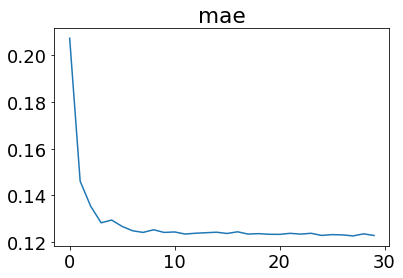

In [78]:
print('timesteps : ', look_back)
plt.plot(history.history['mae'])
plt.title('mae')

timesteps :  64


Text(0.5, 1.0, 'mse')

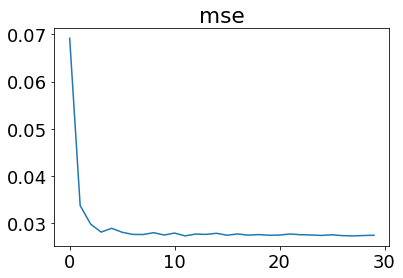

In [79]:
print('timesteps : ', look_back)
plt.plot(history.history['mse'])
plt.title('mse')

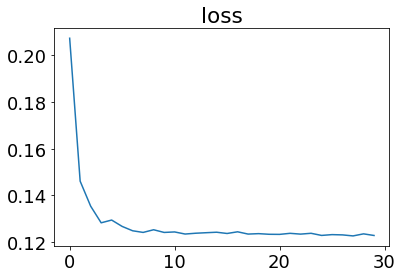

In [80]:
plt.title('loss')
plt.plot(history.history['loss'])

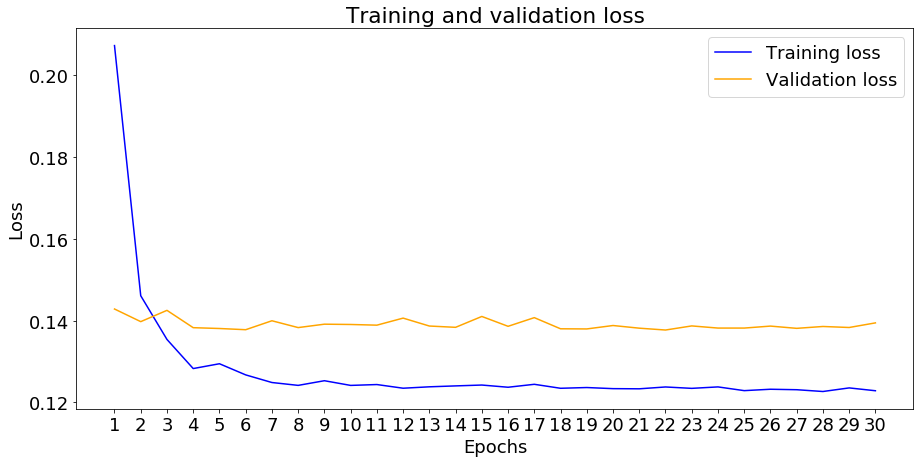

In [81]:
# 画出训练集和验证集的损失曲线

import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
loss_values50 = loss_values[0:150]
val_loss_values50 = val_loss_values[0:150]
epochs = range(1, len(loss_values50) + 1)
plt.plot(epochs, loss_values50, 'b',color = 'blue', label='Training loss')
plt.plot(epochs, val_loss_values50, 'b',color='orange', label='Validation loss')
plt.rc('font', size = 18)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xticks(epochs)
fig = plt.gcf()
fig.set_size_inches(15,7)
#fig.savefig('img/tcstest&validationlosscnn.png', dpi=300)
plt.show()

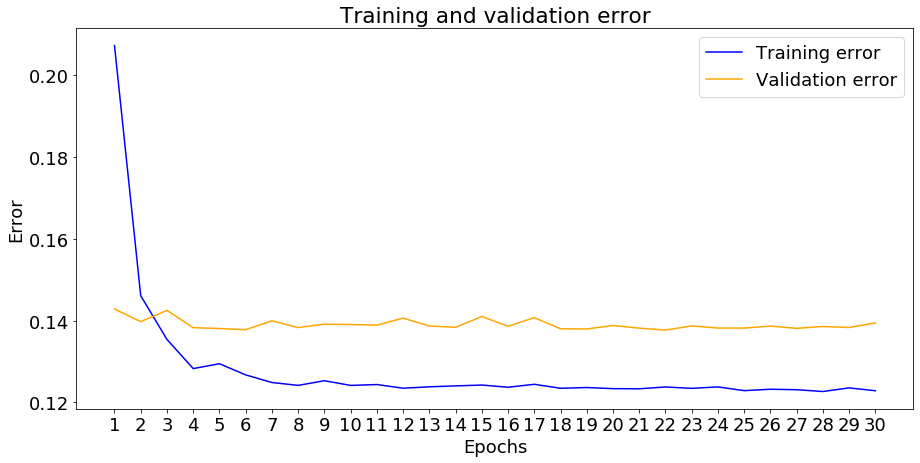

In [82]:
# 画出训练集和验证集的误差图像

#mae = history_dict['mean_absolute_error']
#vmae = history_dict['val_mean_absolute_error']
mae = history.history['mae']
vmae = history.history['val_mae']
epochs = range(1, len(mae) + 1)
plt.plot(epochs, mae, 'b',color = 'blue', label='Training error')
plt.plot(epochs, vmae, 'b',color='orange', label='Validation error')
plt.title('Training and validation error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.xticks(epochs)
fig = plt.gcf()
fig.set_size_inches(15,7)
#fig.savefig('img/tcstest&validationerrorcnn.png', dpi=300)
plt.show()

In [83]:
model.metrics_names

trainScore = model.evaluate([trainX_R, trainX_A], trainY_A, verbose=0)
testScore = model.evaluate([testX_R, testX_A], testY_A, verbose=0)

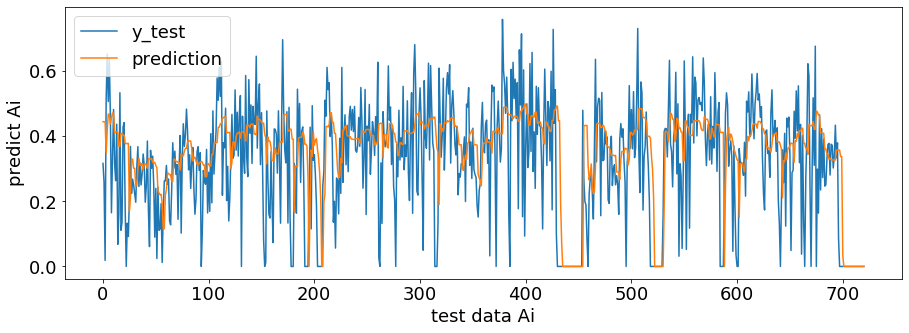

In [84]:
#predicting values for y_test
p = model.predict([testX_R, testX_A])

plt.plot(testY_A, label='y_test')
plt.plot(p, label='prediction')
plt.xlabel('test data Ai')
plt.ylabel('predict Ai')
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(15, 5)
#fig.savefig('img/tcstestcnn.png', dpi=300)
plt.show()

In [85]:
model.save('./SelfData_thesis/0716_U20D00_poisson_CNNLSTM_ONU16_Gi195000_Ai233011_Ai_4layer_timesteps64_epoch30.h5', include_optimizer=False)